<a href="https://colab.research.google.com/github/Swastika0509/Build-with-AI/blob/main/Swastika_Build_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')
Mean Squared Error: 8.411170417456376e-27
Root Mean Squared Error: 9.171243327628145e-14


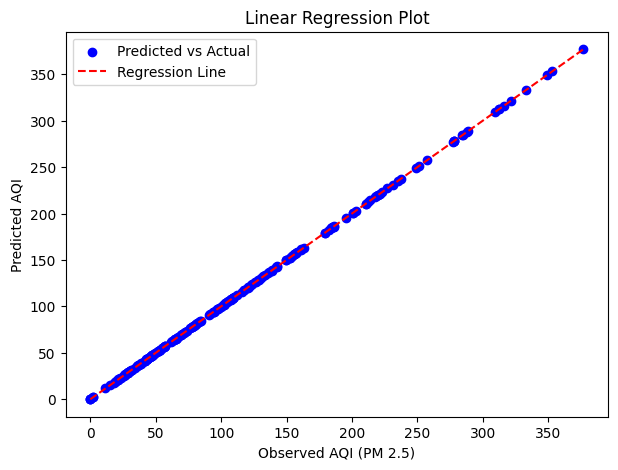

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

url = "https://drive.google.com/uc?id=1f2E4yY9jmZlgRFirp0vSWPx1DlSYJ6ie"
data = pd.read_csv(url)

print(data.columns)
features = ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']
label = 'PM 2.5'

data[features] = data[features].fillna(data[features].mean())

X = data[features]
y = data[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Line')
plt.title('Linear Regression Plot')
plt.xlabel('Observed AQI (PM 2.5)')
plt.ylabel('Predicted AQI')
plt.legend()
plt.show()
